In [1]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix, classification_report

from google.colab import drive, files

In [2]:
drive.mount('/content/drive')
endo_dir = '/content/drive/MyDrive/endometriosis/'

personas_file = os.path.join(endo_dir, 'output', 'predictions', 'PERSONAS', 'personas_predictions.pkl')
personas = pd.read_pickle(personas_file)
personas = personas[personas['type'] == 'post']

Mounted at /content/drive


In [3]:
annotations = pd.read_csv(os.path.join(endo_dir, 'labeling', 'annotated-data', 'formatted-csvs', 'relationships.csv'))
ids = annotations['id'].tolist()

In [4]:
personas['id'] = personas.apply(lambda x: re.sub(r'_post_', '_', x['id']), axis = 1)
personas = personas[personas['id'].isin(ids)]

In [5]:
personas[personas['id'] == 'Endo_w25o3_0']['text'].values[0] == annotations[annotations['id'] == 'Endo_w25o3_0']['text'].values[0]

True

In [6]:
annotations.sort_values(by = 'id')['id'].tolist() == personas.sort_values(by = 'id')['id'].tolist()

True

In [7]:
personas = personas.sort_values(by = 'id').reset_index().drop(columns = ['index'])
annotations = annotations.sort_values(by = 'id').reset_index().drop(columns = ['Unnamed: 0', 'index'])

In [8]:
annotations_arr = np.array(annotations[['DOCTORS', 'FAMILY', 'ENDO SUPPORT COMMUNITY', 'PARTNER']])
predictions_arr = np.array(personas[['predictions_DOCTORS', 'predictions_FAMILY', 'predictions_ENDO SUPPORT COMMUNITY', 'predictions_PARTNER']])
conf_matrices = multilabel_confusion_matrix(annotations_arr, predictions_arr)

<ipython-input-19-db243d11f5b7>:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.1, 0.1, 1, 0.95])


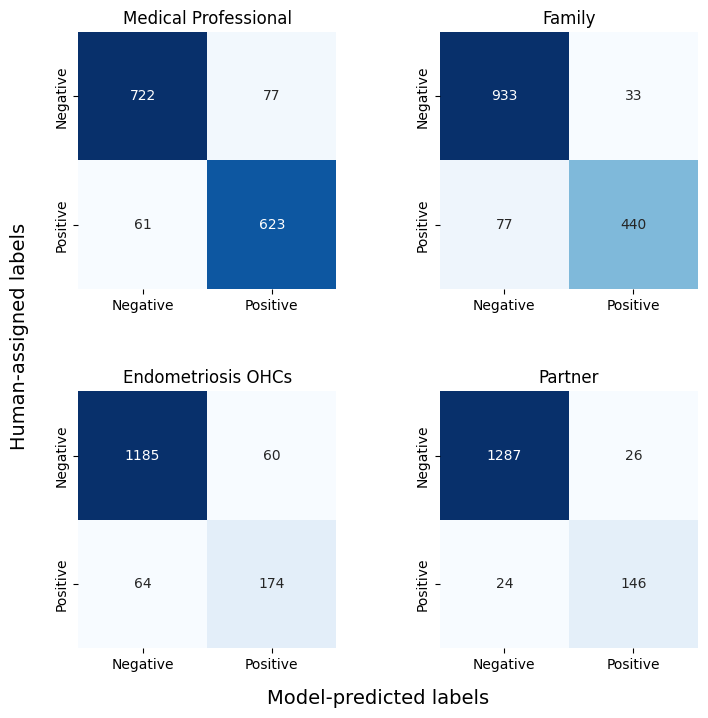

In [19]:
labels = ["Medical Professional", "Family", "Endometriosis OHCs", "Partner"]

fig, axes = plt.subplots(2, 2, figsize=(8, 8), gridspec_kw={'wspace': 0.4, 'hspace': 0.4})  # Create a 2x2 grid of subplots

for i, ax in enumerate(axes.flatten()):
    sns.heatmap(
        conf_matrices[i],
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=["Negative", "Positive"],
        yticklabels=["Negative", "Positive"],
        ax=ax
    )
    ax.set_title(f"{labels[i]}")

fig.text(0.5, 0.04, "Model-predicted labels", ha="center", fontsize=14)
fig.text(0.04, 0.5, "Human-assigned labels", va="center", rotation="vertical", fontsize=14)
plt.tight_layout(rect=[0.1, 0.1, 1, 0.95])
plt.savefig(os.path.join(endo_dir, "output", "figures", "persona_confusion_matrices.png"), dpi=300, bbox_inches="tight")  # Save with high resolution

plt.show()

## Intents

In [10]:
intent_file = os.path.join(endo_dir, 'output', 'predictions', 'INTENT', 'intent_predictions.pkl')
intent = pd.read_pickle(intent_file)
intent = intent[intent['type'] == 'post']

In [11]:
annotations = pd.read_csv(os.path.join(endo_dir, 'labeling', 'annotated-data', 'formatted-csvs', 'intent.csv'))
annotations['id'] = annotations.apply(lambda x: re.sub(r'_post', '', x['id']), axis = 1)
ids = annotations['id'].tolist()

In [12]:
intent['id'] = intent.apply(lambda x: re.sub(r'_post', '', x['id']), axis = 1)
intent = intent[intent['id'].isin(ids)]

In [13]:
annotations.drop_duplicates( subset=['id'], keep='first', inplace=True)
intent.drop_duplicates(  subset=['id'], keep='first', inplace=True)

<ipython-input-13-2e0a8d836bfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intent.drop_duplicates(  subset=['id'], keep='first', inplace=True)


In [14]:
annotations.sort_values(by = 'id')['id'].tolist() == intent.sort_values(by = 'id')['id'].tolist()

True

In [15]:
intent = intent.sort_values(by = 'id').reset_index().drop(columns = ['index'])
annotations = annotations.sort_values(by = 'id').reset_index().drop(columns = ['Unnamed: 0', 'index'])

In [16]:
annotations.head(2)

,id,text,url,accept,SEEKING INFORMATIONAL SUPPORT,PROVIDING INFORMATIONAL SUPPORT,SEEKING EMOTIONAL SUPPORT,PROVIDING EMOTIONAL SUPPORT,SEEKING EXPERIENCES,PROVIDING EXPERIENCES,VENT
0,Endo_1020vb,I was diagnosed with endo a few months ago and...,http://www.reddit.com/r/Endo/comments/1020vb/p...,"['SEEKING EXPERIENCES', 'SEEKING INFORMATIONAL...",1,0,0,0,1,0,0
1,Endo_115f80,Hey ladies! I just found out about this subred...,http://www.reddit.com/r/Endo/comments/115f80/n...,['SEEKING EXPERIENCES'],0,0,0,0,1,0,0


In [17]:
annotations_arr = np.array(annotations[['SEEKING EXPERIENCES', 'SEEKING INFORMATIONAL SUPPORT', 'SEEKING EMOTIONAL SUPPORT', 'VENT']])
predictions_arr = np.array(intent[['predictions_SEEKING_EXPERIENCES', 'predictions_SEEKING_INFO', 'predictions_SEEKING_EMOTION', 'predictions_VENT']])
conf_matrices = multilabel_confusion_matrix(annotations_arr, predictions_arr)

<ipython-input-18-ceccabed390f>:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.1, 0.1, 1, 0.95])


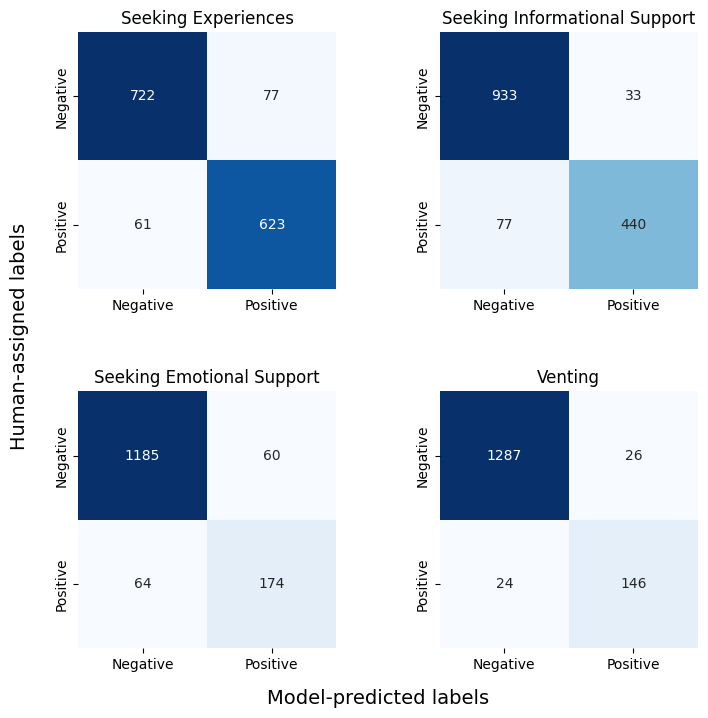

In [18]:
labels = ["Seeking Experiences", "Seeking Informational Support", "Seeking Emotional Support", "Venting"]

fig, axes = plt.subplots(2, 2, figsize=(8, 8), gridspec_kw={'wspace': 0.4, 'hspace': 0.4})  # Create a 2x2 grid of subplots

for i, ax in enumerate(axes.flatten()):
    sns.heatmap(
        conf_matrices[i],
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=["Negative", "Positive"],
        yticklabels=["Negative", "Positive"],
        ax=ax
    )
    ax.set_title(f"{labels[i]}")

fig.text(0.5, 0.04, "Model-predicted labels", ha="center", fontsize=14)
fig.text(0.04, 0.5, "Human-assigned labels", va="center", rotation="vertical", fontsize=14)
plt.tight_layout(rect=[0.1, 0.1, 1, 0.95])
plt.savefig(os.path.join(endo_dir, "output", "figures", "intent_confusion_matrices.png"), dpi=300, bbox_inches="tight")  # Save with high resolution

plt.show()